# Inaugural Project

In [4]:
import numpy as np
from scipy import optimize

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# Importing matplotlib to generate figures 
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

We begin with the following equations:

$$
\begin{align}
c^*,h^* &= \arg \underset{{c,h}}{\max}{c^{1-\phi}h^{\phi}} \tag{1}\\
& s.t. \notag \\
\tilde{p}_h &= p_h \varepsilon \tag{2} \\
m &= \tau(p_h,\tilde{p}_h)+c \tag{3}\\
\tau(p_h,\tilde{p}_h) &= rp_h+\tau ^g \tilde{p}_h + \tau ^p \max\{\tilde{p}_h-\bar{p},0\} \tag{4}
\end{align}
$$

First, we insert $p_h=h$ into (2):

$$
\begin{aligned}
\tilde{p}_h&=p_h \varepsilon = h\varepsilon 
\end{aligned}
$$

Then we re-write equation (4), which is the expression for user costs:

$$
\begin{aligned}
\tau(p_h,\tilde{p}_h)& = user\_costs(h) = rh + \tau ^g h\varepsilon + \tau^p \max{(h\varepsilon-\bar{p},0)}
\end{aligned}
$$

Finally, we define c as a function of m and user costs, which is dependent of h:

$$
\begin{aligned}
m&=\tau(h,\tilde{p}_h)+c \Leftrightarrow \\
c&=m-user\_costs(h)=m-rh \tau ^g h\varepsilon - \tau^p \max{(h\varepsilon-\bar{p},0)}
\end{aligned}
$$

We can now optimize c wrt\. h\. Solving the model numerically we find the following optimal values:
$$
\begin{aligned}
h^*=4.1667 \\
c^*=0.3500 \\
u(c^*,h^*)=0.7378
\end{aligned}
$$

**Code:**

In [13]:
# Creating dictionary for parameters:
parameters = {"phi":0.3, "epsilon":0.5, "r":0.03, "thau_g":0.012, "thau_p":0.004, "p_bar":3}
m = 0.5

# Modelling equations: The first equation is c as a function of all other parameters, using equation (2), (3), (4) and that p_h = h
def user_costs(h, parameters):
    """ Calculates the user costs of housing.

    Args:

    h (float): housing
    parameters (dict) : model parameters.

    Returns:

    (float): costs of housing
    """
    return parameters['r'] * h + parameters['thau_g'] * h * parameters['epsilon'] + parameters['thau_p'] * max(h * parameters['epsilon'] - parameters['p_bar'], 0)

def find_utility(c, h, parameters):
    """ Calculates utility of chosen (consumption, housing) bundle.

    Args:

    c (float): consumption
    h (float): housing 
    parameters (dict): model parameters.

    Returns:

    (float): utility of bundle
    """
    return c**(1-parameters['phi']) * h**parameters['phi']

def choose_c(h, m, parameters):
    """ Chooses the optimal consumption based on the housing costs and cash-on-hand.

    Args:

    h (float): housing
    m (float): cash-on-hand
    parameters (dict): model parameters.

    Returns:
    
    (float): the optimal consumption
    """
    return m - user_costs(h, parameters)

def obj(h, m, parameters):
    """ Objective function which creates the function that is optimized.

    Args:

    h (float): housing
    m (float): cash-on-hand
    parameters (dict): model parameters.

    Returns:
    
    (float): The optimization function. 
    """
    c = choose_c(h, m, parameters)
    return -find_utility(c, h, parameters)


# Maximizing:
res = optimize.minimize_scalar(obj, args=(m, parameters))

# Unpacking results
h_best_scipy = res.x

# Printing the results
print('Using numerical solver the optimal values are:')
print(f'h = {h_best_scipy:.4f}')
print(f'c = {choose_c(h_best_scipy, m, parameters):.4f}')
print(f'u = {find_utility(choose_c(h_best_scipy, m, parameters),h_best_scipy, parameters):.4f}')


Using numerical solver the optimal values are:
h = 4.1667
c = 0.3500
u = 0.7358


# Question 2

Generating a loop for values of m in range 0.4 to 2.5 with corresponding values for $h^*$ and $c^*$ by solving the maximization problem. This results in the figure below:
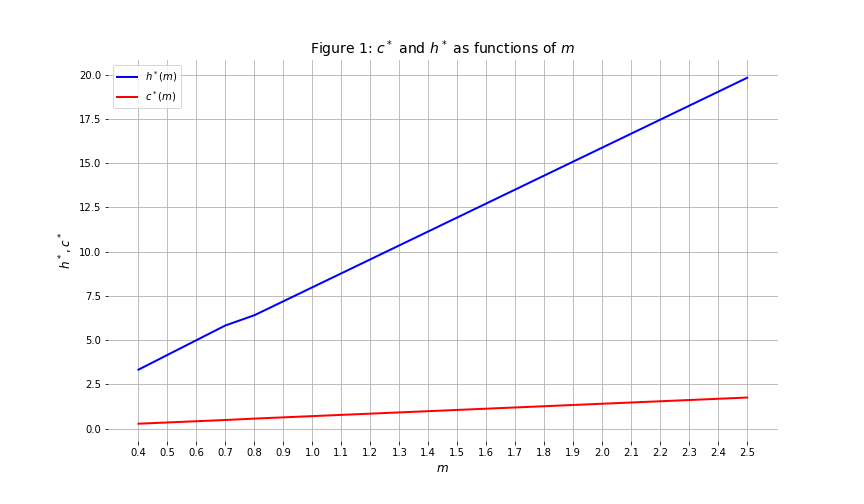

Both consumption of housing and other goods increase when the consumer gets more cash-on-hand. However, the relative share of consumption of other goods decreases when the cash-on-hand increase implying that the consumer uses a larger share on housing when she gets more cash-on-hand. 

**Code:**

h= [3.3333333816902178, 4.1666666039527485, 5.000000059232726, 5.83333332708214, 6.41052630429194, 7.2000000064966745, 7.989473742006892, 8.778947317960506, 9.568421089452153, 10.357894731745967, 11.147368581069456, 11.936842029595617, 12.72631593943782, 13.515789664161604, 14.305263339587297, 15.094736638209682, 15.884210525172984, 16.673683991494936, 17.463158003121492, 18.252631843596948, 19.04210554530968, 19.831579238730807]
c= [0.27999999825915217, 0.35000000225770106, 0.4199999978676219, 0.4900000002250429, 0.5684000004369063, 0.6383999997531264, 0.7083999978037381, 0.7784000019175008, 0.8483999986008182, 0.9184000001936533, 0.9883999939193606, 1.0584000028753666, 1.128399994301363, 1.1983999927618592, 1.2683999930956826, 1.338400007748032, 1.4084000000434267, 1.4784000083231925, 1.5483999958813834, 1.618399989943316, 1.6883999892782322, 1.7583999889282294]
m= [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]


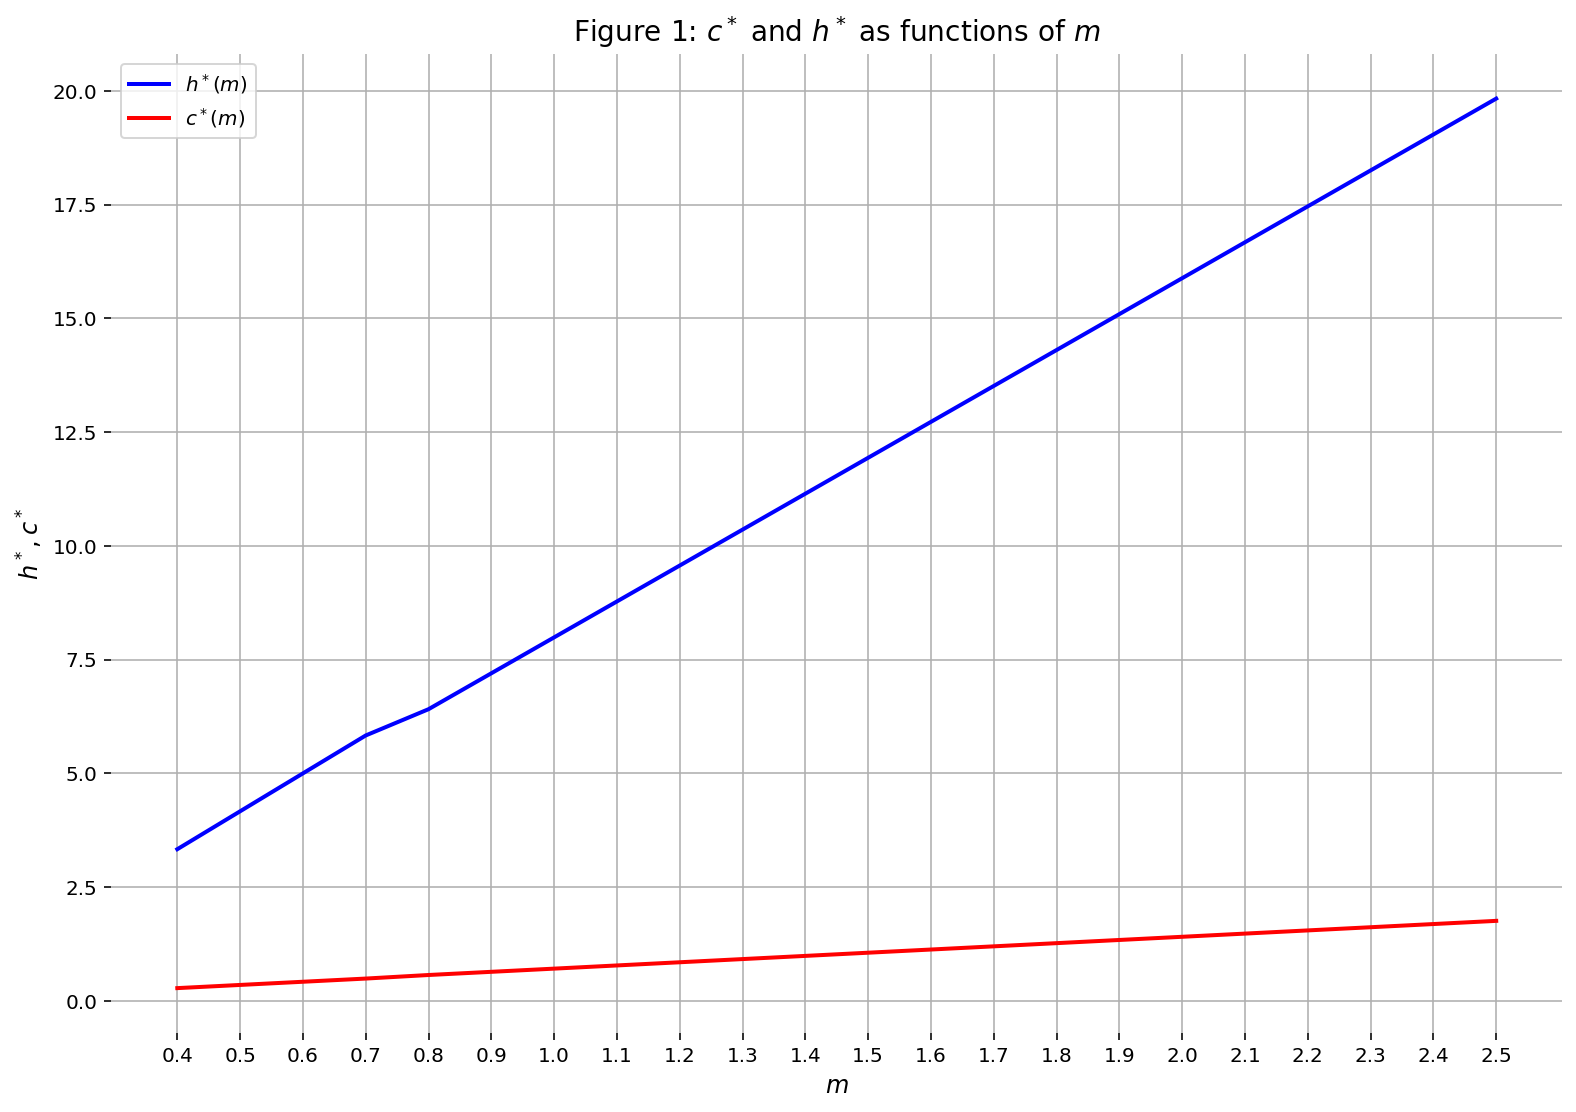

<Figure size 864x504 with 0 Axes>

In [6]:
# Generating empty lists for h, m and c values:
h_list = []
c_list = []
m_list = []

m = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]
# Generating data points for figure by solving the optimization problem for several m values:
for k in m:
    res = optimize.minimize_scalar(obj, args=(k, parameters))

# Unpacking results
    h_best_scipy = res.x
    h_list.append(h_best_scipy)
    c_list.append(choose_c(h_best_scipy, k, parameters))
    m_list.append(k) 
    
# Printing the data points
print("h=", h_list)
print("c=", c_list)
print("m=", m_list)

# Generating the figure:
fig = plt.figure(figsize=(13,9)) # define new figure object
ax = fig.add_subplot(111) # add subplot
ax.plot(m_list, h_list, lw=2, color='blue', label='$h^*(m)$')
ax.plot(m_list, c_list, lw=2, color='red', label='$c^*(m)$')
plt.xticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]) 
ax.grid(True)
   
ax.set_xlabel('$m$', fontsize=12)
ax.set_ylabel('$h^*,c^*$', fontsize=12)
ax.legend(loc='best')
ax.set_title('Figure 1: $c^*$ and $h^*$ as functions of $m$', fontsize=14)
  
# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()
fig.savefig('Figure1.png')
plt.clf()

# Question 3

As the households differ by their cash-on-hand, we start by creating a random distribution of the cash-on-hand, $m$. Then, we solve the maximization problem from question 1 for each random drawn of the households cash-on-hold. 

To calculate the total tax revenue, $T$, we solve the maximization problem $\max\{\tilde{p}^*_{h,i}-\bar{p},0\}$ for each consumer. Finally, we find that the average tax burden per household is 36,327 DKK. 

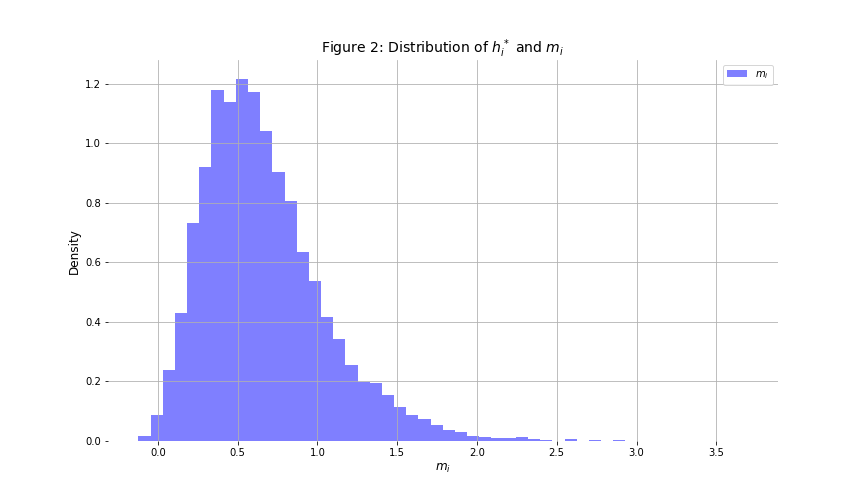
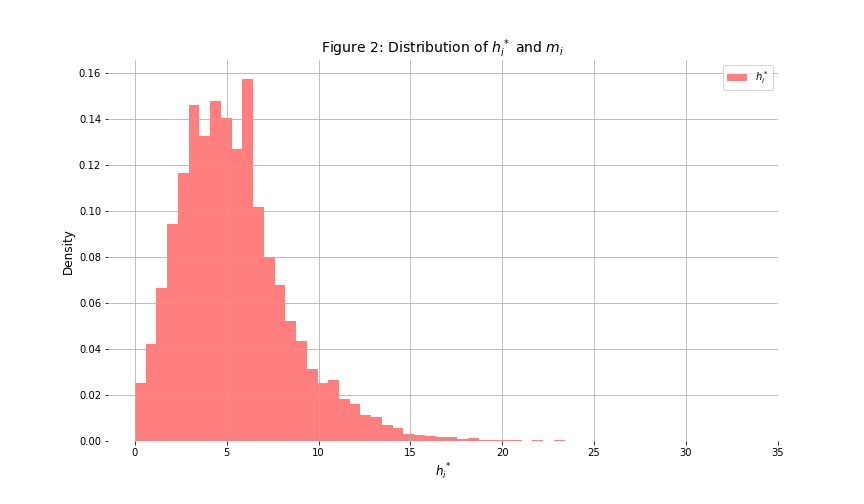


We find that the distribution of $m$ is centered around 0.5 whereas the distribution of h is centered around 5. That implicates that the households are able to borrow money to buy more expensive houses than their cash-on-hand allows. There are no requirements to down-payments why the households can use their cash-on-hand to finance the loan of the house. 

**Code:**

In [7]:
# Creating random distribution of m:
N = 10000
mu = -0.4
sigma = 0.35
seed = np.random.seed(1)
m_random = np.random.lognormal(mu, sigma, N)

#Generating empty lists for h^*:
h_star_list = []

# Solving maximization problem for each random drawn m:
for j in m_random:    
    res = optimize.minimize_scalar(obj, args=(j, parameters))
    
    #Creating lists with results from maximization
    h_star_q3 = res.x
    h_star_list.append(h_star_q3)


In [8]:
#Converting h_matrix to a numpy array:
h_matrix = np.array(h_star_list)

#Generating p_star and fisrt term of the equation for the tax revenue T:
p_star = h_matrix * parameters["epsilon"]
first_term = parameters["thau_g"] * p_star

#Maximizing (p_star-p_bar,0) for each consumer: 
max_list = [] #Generating empty lists for max
for l in p_star:
    d = max(l - parameters["p_bar"], 0)
    max_list.append(d)
    
#Converting max_list to a numpy array and calculating second term:
max_list_np = np.array(max_list)
second_term = parameters["thau_p"] * max_list_np


# Calculating T by summing first and second term of the equation for the tax revenue T:
su = first_term + second_term
T = sum(su)

# Calculating the average tax burden per household
AverageT = T / N
AverageT_DKK = AverageT * 1000000
print(AverageT_DKK)

36326.80342753969


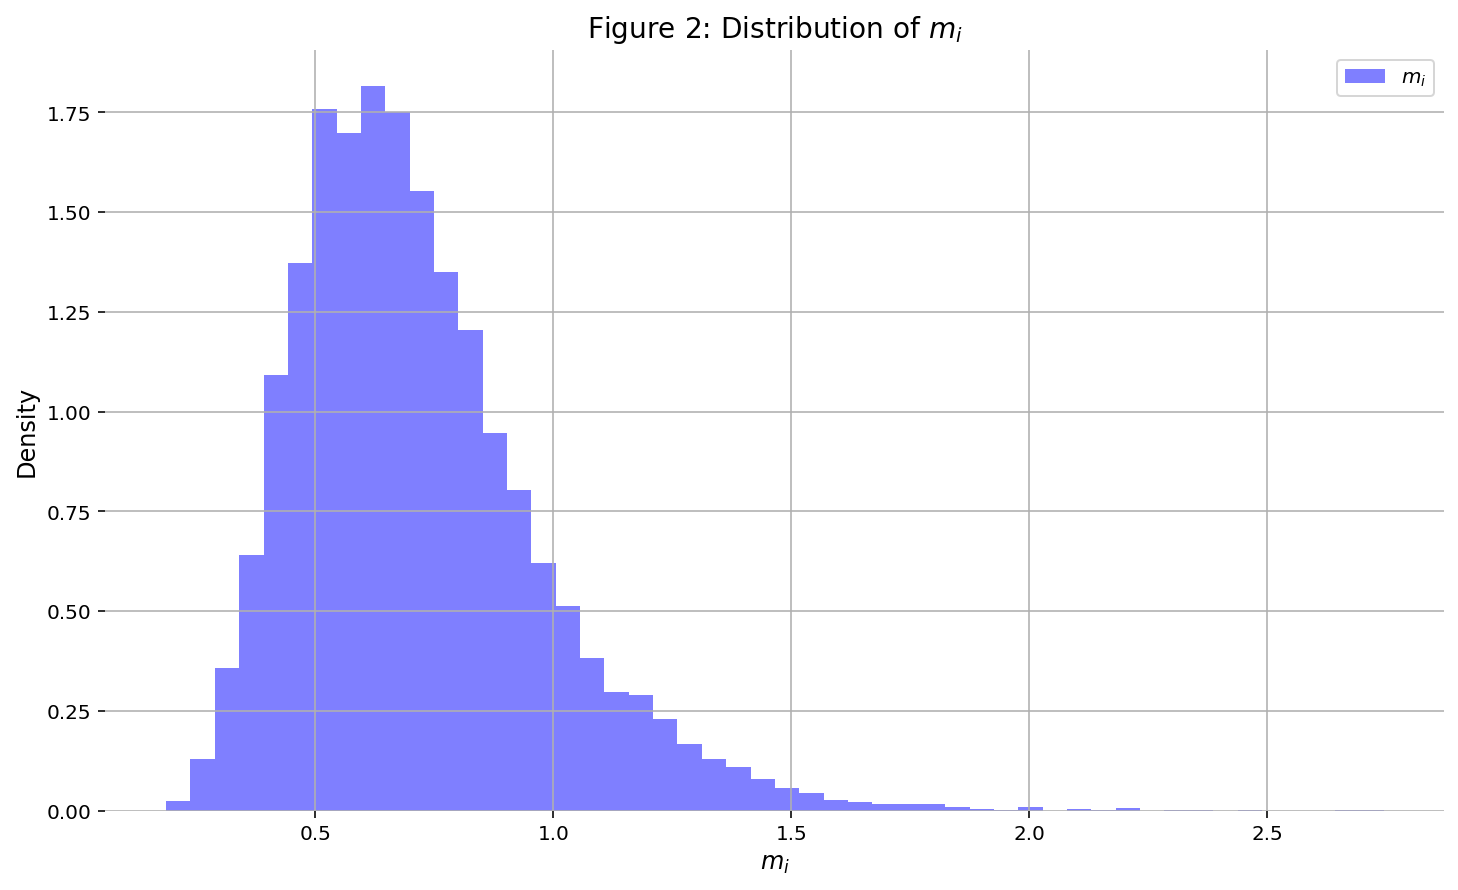

<Figure size 864x504 with 0 Axes>

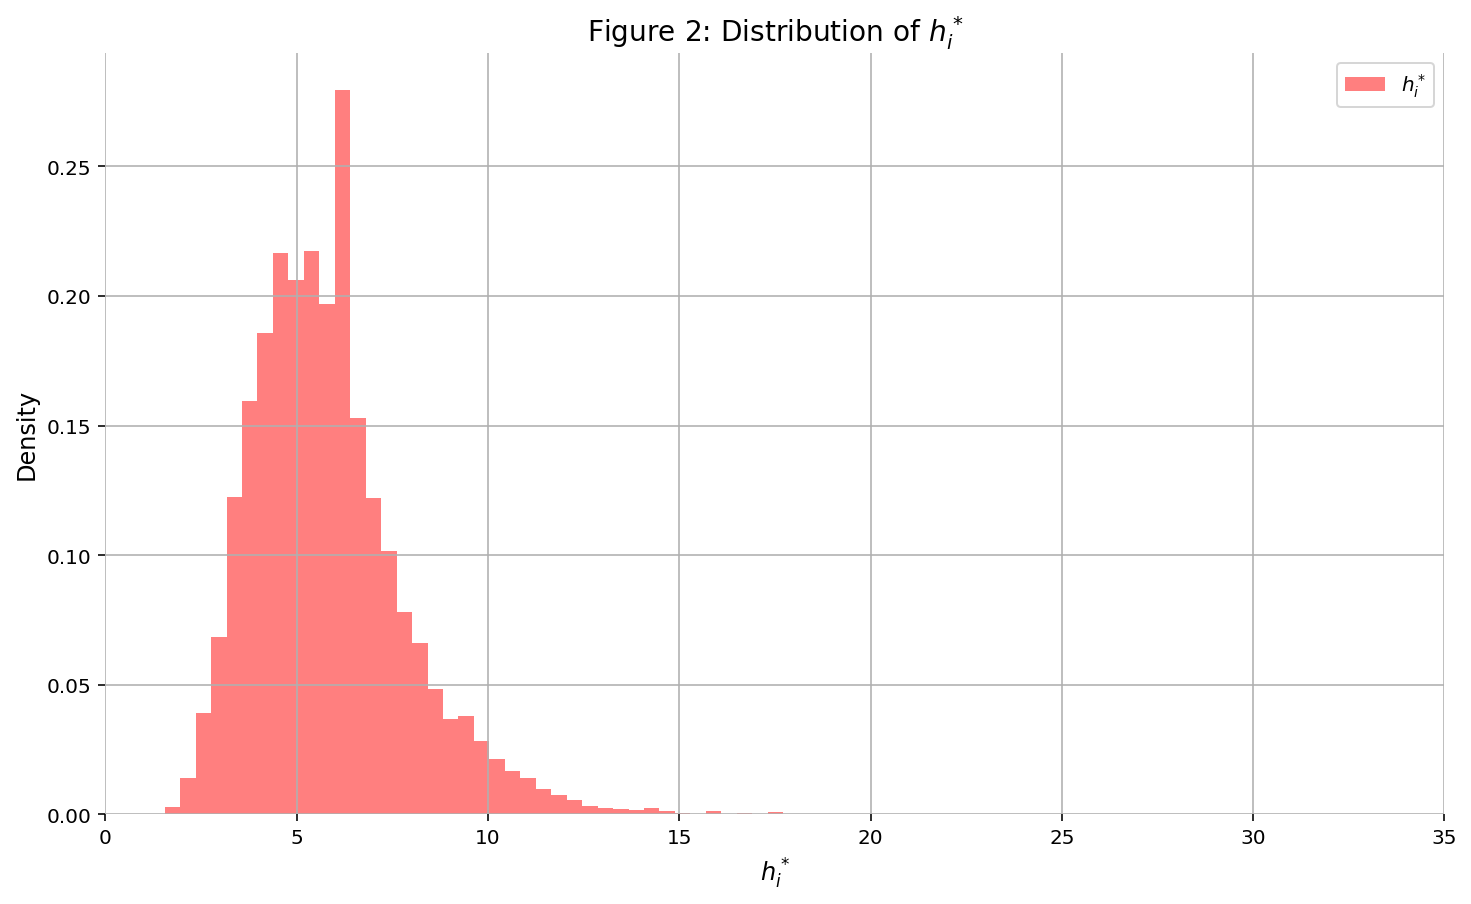

<Figure size 864x504 with 0 Axes>

In [9]:
# Optional figures
# Generating the distribution figure of m:
fig = plt.figure() # define new figure object
ax = fig.add_subplot(111) # add subplot
plt.hist(m_random, bins=50, color='blue', lw=10, density=True, alpha=0.5, label="$m_i$")
ax.grid(True)
   
ax.set_xlabel('$m_i$', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Figure 2: Distribution of $m_i$', fontsize=14)
ax.legend(loc='best')

  
# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fig.savefig('Figure2.png')
plt.show()
plt.clf()

# Generating the density figure of h:
fig = plt.figure() # define new figure object
ax = fig.add_subplot(111) # add subplot
plt.hist(h_star_list, bins=50, color='red', lw=10, density=True, alpha=0.5, label="$h_i^*$")
ax.grid(True)
   
ax.set_xlabel('$h_i^*$',fontsize=12)
ax.set_ylabel('Density',fontsize=12)
ax.set_title('Figure 2: Distribution of $h_i^*$',fontsize=14)
ax.legend(loc='best')
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35]) 

  
# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fig.savefig('Figure3.png')
plt.show()
plt.clf()

# Question 4

We define a new set of parameters, $parameters\_new$.

Then we maximize the utility function with respect to $h$, the same way as in question 1. 

$\tau ^p$ increases from 0.004 to 0.009, indicating that house owners who owns a house above 8 mill. DKK, are paying a higher additional tax. However, $\bar{p}$ is increasing from 3 mill. DKK to 8 mill. DKK, so the tax base of the additional tax is lower. In addition to this, $\tau ^g$ decreases from 0.012 to 0.010, the tax rate of the public assesment decreases. Thus, each house owner pays a lower tax of their house. These three effects implies that the average tax burden would decrease.

However, $\varepsilon$ increases, which means that the public assessments now are higher and closer to the market value. Thus, each house owner now faces a larger tax burden, all things equal.

We find that the average tax burden now is 45,036 DKK, which indicates that the latter effect is larger than the first three effects, such that the final effect of the new parameters results in a larger avergae tax burden per household. 

**Code:**

In [10]:
# Creating new dictionary
parameters_new = {"phi":0.3, "epsilon":0.8, "r":0.03, "thau_g":0.01, "thau_p":0.009, "p_bar":8}

# Defining same functions with new parameters:
def user_costs_q4(h, parameters_new):
    """ Calculates the user costs of housing.

    Args:

    h (float): housing
    parameters_new (dict) : model parameters.

    Returns:

    (float): costs of housing
    """
    return parameters_new['r'] * h + parameters_new['thau_g'] * h * parameters_new['epsilon'] \
           + parameters_new['thau_p'] * max(h * parameters_new['epsilon'] - parameters_new['p_bar'], 0)

def find_utility_q4(c, h, parameters_new):
    """ Calculates utility of chosen (consumption, housing) bundle.

    Args:

    c (float): consumption
    h (float): housing 
    parameters_new (dict): model parameters.

    Returns:

    (float): utility of bundle
    """
    return c**(1 - parameters_new['phi']) * h**parameters_new['phi']

def choose_c_q4(h, m, parameters_new):
    """ Chooses the optimal consumption based on the housing costs and cash-on-hand.

    Args:

    h (float): housing
    m (float): cash-on-hand
    parameters_new (dict): model parameters.

    Returns:
    
    (float): the optimal consumption
    """
    return m - user_costs_q4(h, parameters_new)

def obj_q4(h, m, parameters_new):
    """ Objective function which creates the function that is optimized.

    Args:

    h (float): housing
    m (float): cash-on-hand
    parameters_new (dict): model parameters.

    Returns:
    
    (float): The optimization function. 
    """
    c = choose_c(h, m, parameters_new)
    return -find_utility_q4(c, h, parameters_new)

# Creating new empty list for h_star:
h_star_list_q4 = []

# Solving maximization problem for each random drawn m:
for n in m_random:    
    res = optimize.minimize_scalar(obj_q4, args=(n, parameters_new))
    
    #Creating lists with results from maximization
    h_star_q4 = res.x
    h_star_list_q4.append(h_star_q4)

# Converting h_matrix to a numpy array:
h_matrix_q4 = np.array(h_star_list_q4)

#Generating p_star and fisrt term of the equation for the tax revenue T:
p_star_q4 = h_matrix_q4 * parameters_new["epsilon"]
first_term_q4 = parameters_new["thau_g"] * p_star_q4

#Maximizing (p_star-p_bar,0) for each consumer: 
max_list_q4 = [] #Generating empty lists for max

for z in p_star_q4:
    d_q4 = max(z - parameters_new["p_bar"], 0)
    max_list_q4.append(d_q4)
    
#Converting max_list to a numpy array and calculating second term:
max_list_np_q4 = np.array(max_list_q4)
second_term_q4 = parameters_new["thau_p"] * max_list_np_q4

# Calculating T by summing first and second term of the equation for the tax revenue T:
su_q4 = first_term_q4 + second_term_q4
T_q4 = sum(su_q4)

# Calculating the average tax burden per household
AverageT_q4 = T_q4 / N
AverageT_DKK_q4 = AverageT_q4 * 1000000
print(AverageT_DKK_q4)

45036.29313706028


# Question 5

The average tax burden per household must be 36,327 DKK, which means that the total tax burden T is 363,270,000 DKK. Inserting this into the equation of the average tax burden per household, gives us:

$$
\begin{align}
T &= \sum_{i=1}^N \tau ^g \tilde{p}_{i,h}^*+\tau^p \max{(h\varepsilon-\bar{p},0)}= 363,270,000 \Leftrightarrow \\
\tau^g &= \frac{363,270,000-\tau ^p \sum_{i=1}^N \max{(h\varepsilon-\bar{p},0)}}{\sum_{i=1}^N \tilde{p}_{i,h}^*} \tag{5}\\
&= \frac{363,270,000/N-\tau ^p \sum_{i=1}^N \max{(h\varepsilon-\bar{p},0)}/N}{\sum_{i=1}^N \tilde{p}_{i,h}^*/N}\\
&=\frac{36,327-\tau ^p \max{(h\varepsilon-\bar{p},0)}}{\tilde{p}_{i,h}^*} \\
&=\frac{36,327-\tau ^p \max{(h\varepsilon-\bar{p},0)}}{h\varepsilon}
\end{align}
$$

Thus, we can use this expression for $\tau^g$ to define a new expression for user costs:
$$
\begin{aligned}
user\_costs(h)&=rh + \tau ^g h\varepsilon + \tau^p \max{(h\varepsilon-\bar{p},0)} \\
&= rh+\frac{36,327-\tau ^p \max{(h\varepsilon-\bar{p},0)}}{h\varepsilon}h\varepsilon + \tau^p \max{(h\varepsilon-\bar{p},0)}  \\
&=rh+36,327-\tau^p \max{(h\varepsilon-\bar{p},0)} + \tau^p \max{(h\varepsilon-\bar{p},0)} \\
&= rh+36,327
\end{aligned}
$$

By optimizing these user costs, we find the new optimal $h_i^*$, and thus we find $\tau^g$ by computing equation (5). The value of $\tau^g$, which offsets the two opposite effects from the changed parameters is 0.0064 such that the average tax burden is still 36,327 DKK.

**Code:**

In [12]:
# Creating new dictionary
parameters_q5 = {"phi":0.3, "epsilon":0.8, "r":0.03, "thau_p":0.009, "p_bar":8}

# Defining the new user cost function: 
def user_costs_q5(h, parameters_q5):
    """ Calculates the user costs of housing.

    Args:

    h (float): housing
    parameters_q5 (dict) : model parameters.

    Returns:

    (float): costs of housing
    """
    return parameters_q5["r"] * h + AverageT

def choose_c_q5(h, m, parameters_q5):
    """ Chooses the optimal consumption based on the housing costs and cash-on-hand.

    Args:

    h (float): housing
    m (float): cash-on-hand
    parameters_q5 (dict): model parameters.

    Returns:
    
    (float): the optimal consumption
    """
    return m - user_costs_q5(h, parameters_q5)

def obj_q5(h, m, parameters_q5):
    """ Objective function which creates the function that is optimized.

    Args:

    h (float): housing
    m (float): cash-on-hand
    parameters_q5 (dict): model parameters.

    Returns:
    
    (float): The optimization function. 
    """
    c = choose_c_q5(h, m, parameters_q5)
    return -find_utility_q4(c, h, parameters_q5)

# Creating new empty list for h_star:
h_star_list_q5 = []

# Solving maximization problem for each random drawn m:
for n in m_random:    
    res = optimize.minimize_scalar(obj_q5, args=(n, parameters_q5))
    
    # Creating lists with results from maximization
    h_star_q5 = res.x
    h_star_list_q5.append(h_star_q5)

# Converting h_matrix to a numpy array:
h_matrix_q5 = np.array(h_star_list_q5)

# Generating p_star:
p_star_q5 = h_matrix_q5 * parameters_q5["epsilon"]

# Generating the average of p_star for calculating tau^g:
p_N = sum(p_star_q5)/N

# Maximizing (p_star-p_bar,0) for each consumer: 
max_list_q5 = [] # Generating empty lists for max

for y in p_star_q5:
    d_q5 = max(y - parameters_new["p_bar"], 0)
    max_list_q5.append(d_q5)
    
# Converting max_list to a numpy array:
max_q5 = np.array(max_list_q5)

# Generating the average of the max-function for calculating tau^g:
max_N = sum(parameters_q5['thau_p']*max_q5)/N

# Calculating tau^g:
tau_g_new = (AverageT - max_N)/p_N
print(tau_g_new)

# Checking if we get the right tax revenue with the thau^g found above:
T_test = tau_g_new*p_N+max_N
print(T_test*1000000)


0.006387536671443681
36326.80342753969


# Conclusion

In this assignment we find that the household's optimal amounts of housing, $h^*$, is 4.2 mill. DKK and consumption of other goods, $c^*$, is 400,000 DKK, which gives an optimal utility of 0.7. When we consider a population of 10,000 households, we find that the average tax burden per household is 36,327 mill. DKK given a set of parameters. After implementing the new tax system on housing given new parameters, we find ambigious effects. On one hand, each house owner will pay a lower tax of their house, which implies that the average tax burden will decrease. On the other, the public assessments are higher and closer to the market value. We conclude that the average taxes are 46,036 mill. DKK, implying that each house owner will face a larger tax burden. When the policy maker instead decides to implement the reform implicitly, we calculate $\tau^g$ to 0.006. When $\tau^g=0.006$ the tax reform changes will be offset, and the average tax payments will still be 36,328 DKK.